In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from scipy import misc
import warnings
warnings.filterwarnings('ignore')

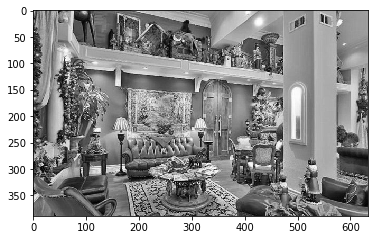

In [3]:
# image
imagePath = 'details.jpg'
image = Image.open(imagePath)
grayscaleImage = image.convert('F')
plt.imshow(grayscaleImage, cmap='gray')
# plt.axis('off')
plt.show()

In [4]:
# variables
sigma = 1.6
s = 2
k = 2 ** (1/s)
noOfOctaves = 4
imagesPerOctave = s + 3

In [5]:
# initialize arrays of values which will be used as a blur parameter to the gaussian filter
blurValues = np.zeros((noOfOctaves, imagesPerOctave))
val = sigma
#val = k/2
for i in range(noOfOctaves):
    for j in range(imagesPerOctave):
        blurValues[i][j] = val
        val = val*k
    val = blurValues[i][2]
blurValues

array([[ 1.6      ,  2.2627417,  3.2      ,  4.5254834,  6.4      ],
       [ 3.2      ,  4.5254834,  6.4      ,  9.0509668, 12.8      ],
       [ 6.4      ,  9.0509668, 12.8      , 18.1019336, 25.6      ],
       [12.8      , 18.1019336, 25.6      , 36.2038672, 51.2      ]])

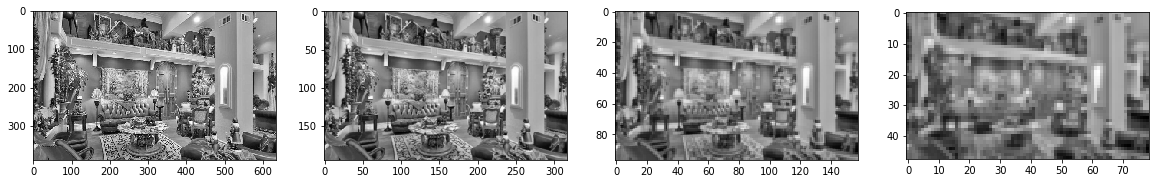

In [6]:
# set up images of different scales for each octave
ImageSize1 = np.array(grayscaleImage) # original-size image
ImageSize2 = misc.imresize(ImageSize1, 50, 'bilinear')
ImageSize4 = misc.imresize(ImageSize2, 50, 'bilinear')
ImageSize8 = misc.imresize(ImageSize4, 50, 'bilinear')

fig = plt.figure(figsize=(20, 20))
fig.add_subplot(1, 4, 1)
plt.imshow(ImageSize1, cmap='gray')
fig.add_subplot(1, 4, 2)
plt.imshow(ImageSize2, cmap='gray')
fig.add_subplot(1, 4, 3)
plt.imshow(ImageSize4, cmap='gray')
fig.add_subplot(1, 4, 4)
plt.imshow(ImageSize8, cmap='gray')

plt.show()

In [11]:
# calculate gaussian blurred images for each octave
scaledImages = [ImageSize1, ImageSize2, ImageSize4, ImageSize8]

octaves = []
octave1 = np.zeros((ImageSize1.shape[0], ImageSize1.shape[1], imagesPerOctave))
octave2 = np.zeros((ImageSize2.shape[0], ImageSize2.shape[1], imagesPerOctave))
octave3 = np.zeros((ImageSize4.shape[0], ImageSize4.shape[1], imagesPerOctave))
octave4 = np.zeros((ImageSize8.shape[0], ImageSize8.shape[1], imagesPerOctave))
octaves.append(octave1)
octaves.append(octave2)
octaves.append(octave3)
octaves.append(octave4)

for i in range(noOfOctaves):
    for j in range(imagesPerOctave):
        octaves[i][:,:,j]= gaussian_filter(scaledImages[i], sigma=blurValues[i][j])

In [12]:
# calculate differences of Gaussians(DoG) for each octave
DoGs = []
DoGImageNo = imagesPerOctave-1
DoG1 = np.zeros((ImageSize1.shape[0], ImageSize1.shape[1], DoGImageNo))
DoG2 = np.zeros((ImageSize2.shape[0], ImageSize2.shape[1], DoGImageNo))
DoG3 = np.zeros((ImageSize4.shape[0], ImageSize4.shape[1], DoGImageNo))
DoG4 = np.zeros((ImageSize8.shape[0], ImageSize8.shape[1], DoGImageNo))
DoGs.append(DoG1)
DoGs.append(DoG2)
DoGs.append(DoG3)
DoGs.append(DoG4)

for i in range(noOfOctaves):
    for j in range(DoGImageNo):
        DoGs[i][:,:,j] = octaves[i][:,:,j+1] - octaves[i][:,:,j]

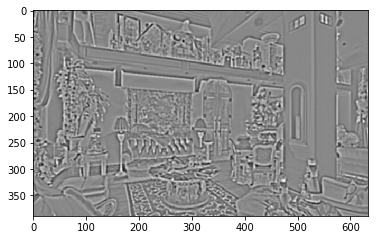

In [22]:
plt.imshow(DoGs[0][:,:,0], cmap='gray')
plt.show()

In [10]:
# locate extrema in DoG images

In [179]:
# filter the extrema, removing keypoints along edges

In [182]:
# keypoint magnitude and orientation assignment

In [181]:
# keypoint descriptors